# Spurious Charge Study
Mauricio Martinez, Brenda Cervantes, Pedro Silves

In [1]:
from functions_py import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

#### Functions

In [2]:
# Funtions
def hist_RowColumn(data_array):
    Col=np.median(data_array, axis=0)
    #Col=data[10:640,0]#analisis de Registro vertical, Columnas V
    bins_Col=np.histogram_bin_edges(Col, bins='fd')
    Col_hist, bins_Col = np.histogram(Col,bins=bins_Col)
    u_Col, std_Col = norm.fit(Col)
    

    Row=np.median(data_array, axis=1)
    #Row=data[10,10:690] #analisis de Registro horizontal, Renglones H    
    bins_Row=np.histogram_bin_edges(Row, bins='fd')
    Row_hist, bins_Row = np.histogram(Row,bins=bins_Row) 
    u_Row, std_Row = norm.fit(Row)
    

    print('media on Row='+str(u_Row)+', stdDev on y='+str(std_Row))
    print('media on Col='+str(u_Col)+', stdDev on y='+str(std_Col))

    return Row, Col, bins_Row, bins_Col, Row_hist, Col_hist

def line(x, m, b): #data, slope, y-intersection (ordenada al origen)
    return (m*x+b)

def secOrder(x,a,b,c):
    return a*x**2 + b*x + c 

def totTime(path):
    hdul=fits.open(path)# fits file to analyze
    header=hdul[0].header

    tStartList=str(header._cards[159]).split("'")[1].split('T')[1].split(':')
    tEndList=str(header._cards[160]).split("'")[1].split('T')[1].split(':')

    tStart=int(tStartList[0])*3600+int(tStartList[1])*60+int(tStartList[2])
    tEnd=int(tEndList[0])*3600+int(tEndList[1])*60+int(tEndList[2])

    dateStart=header._cards[159][1].split('T')[0]
    dateEnd=header._cards[160][1].split('T')[0]
    if (int(dateEnd.split('-')[-1])-int(dateStart.split('-')[-1])) >0:
        Ttot=tEnd+86400-tStart        # Total time 
    else:
        Ttot=tEnd-tStart        # Total time 

    NRow=int(str(header._cards[15]).split("'")[1])
    NCol=int(str(header._cards[16]).split("'")[1])
    NSamp=int(str(header._cards[17]).split("'")[1])


    deltaTperPix=Ttot/(NCol*NRow)
    deltaTperRow=Ttot/NRow

    expoTimes=[]
    
    for mCol in range(0,NCol):  #Fill Exposure Matrix
        expoTimes.append([])
        for nRow in range(0,NRow):
            expoTimes[mCol].append(deltaTperRow*mCol+deltaTperPix*nRow)


    ExpoMatrix=np.array(expoTimes)
    #NROW650_NCOL700
        
    
    return ExpoMatrix, Ttot, NRow, NCol, NSamp

def exposureFactor(path):
    ExpoMatrix,_,_,_,_=totTime(path)
    fig_all, axs_all = plt.subplots(nrows=1, ncols=2, figsize=(15, 5),constrained_layout=True)		# Create figures
    fig_all.suptitle('Exposure Factor', fontsize='large')
    popt, pcov = curve_fit(line, range(0, len(ExpoMatrix[0])),ExpoMatrix[0]) #ajustar valores de x y yRuido a la funcion "func"
    axs_all[0].set_title('Horizontal')
    axs_all[0].set_ylim([-4, 15])
    axs_all[0].set_ylabel('Exposure time [s]')
    axs_all[0].set_xlabel('Col')
    axs_all[1].set_xlabel('Row')
    axs_all[0].plot(range(0,len(ExpoMatrix[0])), line(range(0,len(ExpoMatrix[0])), popt[0], popt[1]),'r-', label='fit: m=%f [s/pix], b=%f' % tuple(popt))
    HEF=popt[0] #Horizontal exposure factor
    axs_all[0].legend()
    popt, pcov = curve_fit(line, range(0, len(ExpoMatrix[:,0])),ExpoMatrix[:,0])
    axs_all[1].set_title('Vertical')
    axs_all[1].plot(range(0,len(ExpoMatrix[:,0])), line(range(0,len(ExpoMatrix[:,0])), popt[0], popt[1]),'b-', label='fit by column: m=%f [s/pix], b=%f' % tuple(popt))
    VEF=popt[0] #Vertical Exposure Factor
    axs_all[1].legend()
    plt.show()
    return HEF, VEF

def sum_intensity(region, intensities):
    return np.sum(intensities[region])




#### Format of images

In [3]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

# Microchip images

## Raw Image

Filename: /home/mauricio/datosFits/microchip/testMarzo/19JUN23/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_4_NROW_529_NCOL_540_EXPOSURE_120_NBINROW_1_NBINCOL_1_img_17.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     165   (540, 529)   float32   
  1                1 ImageHDU       164   (540, 529)   float32   
  2                1 ImageHDU       164   (540, 529)   float32   
  3                1 ImageHDU       164   (540, 529)   float32   


None
----------------


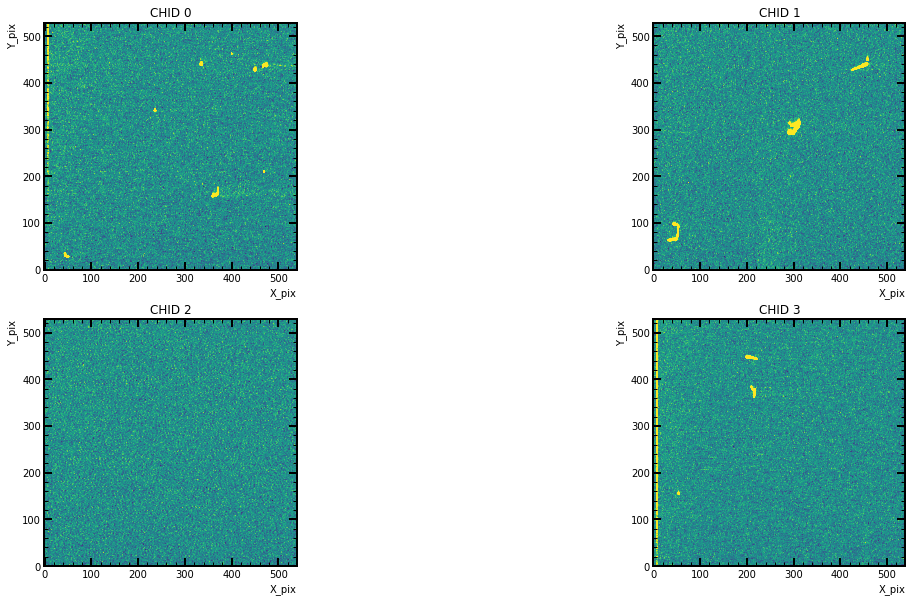

In [4]:
path='/home/mauricio/datosFits/microchip/testMarzo/19JUN23/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_4_NROW_529_NCOL_540_EXPOSURE_120_NBINROW_1_NBINCOL_1_img_17.fits'
hdu_list = fits.open(path)
print(hdu_list.info())
print('----------------')
# hdu_list[0].header
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(hdu_list[i].data-np.median(hdu_list[i].data),vmin=-800,vmax=800)
    plt.title('CHID '+str(i))
    plt.ylabel('Y_pix')
    plt.xlabel('X_pix')
plt.show()

### Calibrate image

In [46]:
hdu_list[0].data.shape

(529, 540)

In [41]:
hdu_list.data

AttributeError: 'HDUList' object has no attribute 'data'

In [26]:
data[0]=data[0]/200

In [30]:
nsamp=4
if nsamp > 200:
    data_pre = precal(hdu_list,extensions=4)
    gain, gain_err, data= LocalCalib(data_pre,extensions=4)
else:
    data = hdu_list[i].data
    gain=[200,200,200,200]
    gain_err=[0,0,0,0]
    for extension in range(data):
        data[extension]=data[extension]/gain[extension]
    




TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
fig=plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(data[i],vmin=-1,vmax=1)
    plt.title('CHID '+str(i))
    plt.ylabel('Y_pix')
    plt.xlabel('X_pix')
    print("CHID "+str(i)+' Gain:({:.2f} +- {:.2f})ADUs'.format(gain[i],gain_err[i]))
plt.suptitle('Calibrated Images')
plt.savefig('IMAGES_POSCALIB.png', bbox_inches='tight', dpi=100)
    
plt.show()


In [6]:
ExpoMatrix, Ttot, NRow, NCol, NSamp= totTime(path)
fig=plt.figure(figsize=(15,10))
#plt.imshow(ExpoMatrix,vmin=0,vmax=50)

#ExpoMatrix
#Ttot

<Figure size 1080x720 with 0 Axes>

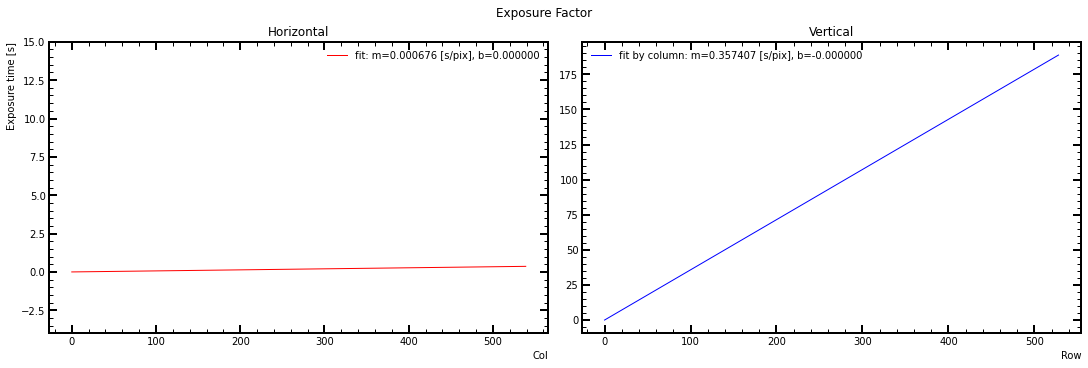

In [7]:
HEF, VEF = exposureFactor(path) #Exposure Factor in [s/pix]

media on Row=0.012702301704372433, stdDev on y=0.047495892315840886
media on Col=0.01582392069165608, stdDev on y=0.08551544420993354


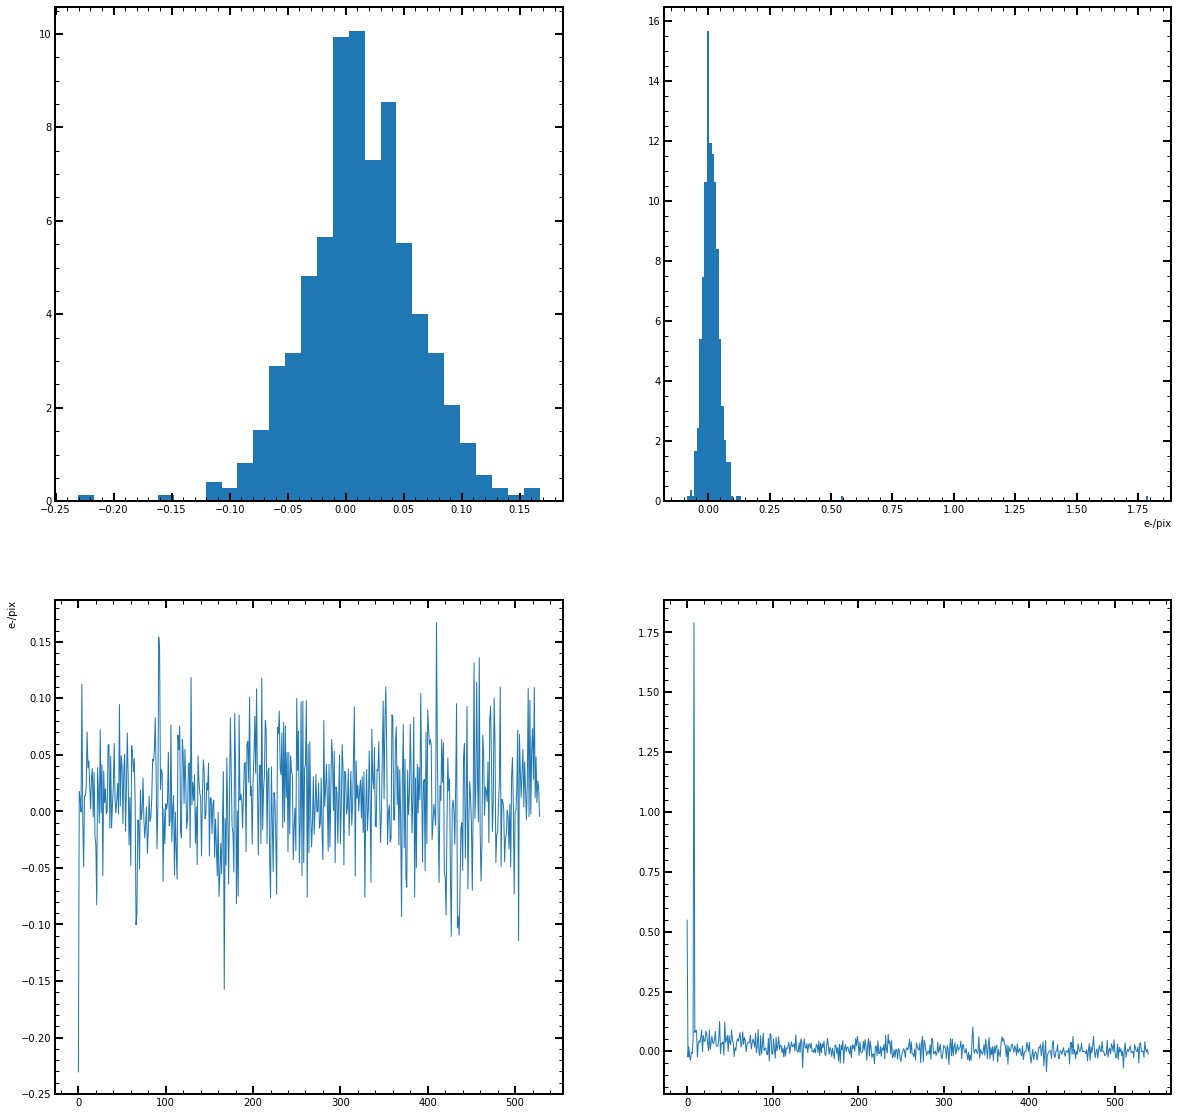

In [8]:
data_masked=data[0]#-1e7*(maskV_bleeding+mask_bleeding+SRE_mask)

data_Row, data_Col, Row_bins, Col_bins, Row_hist, Col_hist = hist_RowColumn(data_masked)

fig_all, axs_all = plt.subplots(2, 2, figsize=(20, 20))		# Create figures


axs_all[0][0].hist(data_Row, Row_bins, density=True)

axs_all[0][1].hist(data_Col, Col_bins, density=True)

axs_all[1][0].plot(data_Row)

axs_all[1][1].plot(data_Col)

axs_all[1][0].set_ylabel('e-/pix')
axs_all[0][1].set_xlabel('e-/pix')

plt.show()


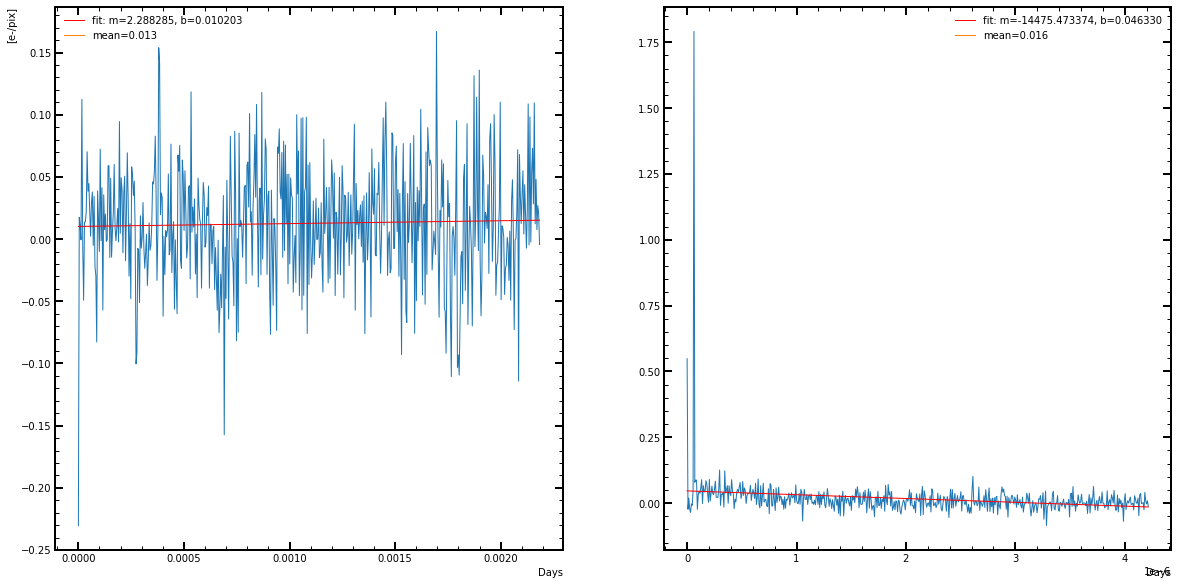

In [9]:
#NROW650_NCOL700
fig_all, axs_all = plt.subplots(1, 2, figsize=(20, 10))		# Create figures
x_data=[]
i=0

for value in data_Row:  
            x_data.append(i)
            i+=1
Xdata=np.array(x_data)*VEF/86400

axs_all[0].plot(Xdata, data_Row) #Xdata[Pix]*VEF[S/Pix], data_Row[e-]*86400[s/day]/VEF[s/pix]
popt, pcov = curve_fit(line, Xdata, data_Row)
axs_all[0].plot(Xdata, line(Xdata, popt[0], popt[1]), 'r-', label='fit: m=%f, b=%f' % tuple(popt)) #plot de xdata vs f(xdata)
rowValues=popt
axs_all[0].plot(np.mean(data_Row), label="mean=%5.3f" % np.mean(data_Row) )
axs_all[0].set_ylabel('[e-/pix]')
axs_all[0].set_xlabel('Days')
axs_all[0].legend()

x_data=[]
i=0

for value in data_Col:  
            x_data.append(i)
            i+=1
Xdata=np.array(x_data)*HEF/86400

axs_all[1].plot(Xdata, data_Col)
popt, pcov = curve_fit(line, Xdata[:550], data_Col[:550])
axs_all[1].plot(Xdata[:550], line(Xdata[:550], popt[0], popt[1]), 'r-', label='fit: m=%f, b=%f' % tuple(popt)) #plot de xdata vs f(xdata)
colValues=popt
axs_all[1].plot(np.mean(data_Col[:550]), label="mean=%5.3f" % np.mean(data_Col) )
axs_all[1].set_xlabel('Days')
axs_all[1].legend()

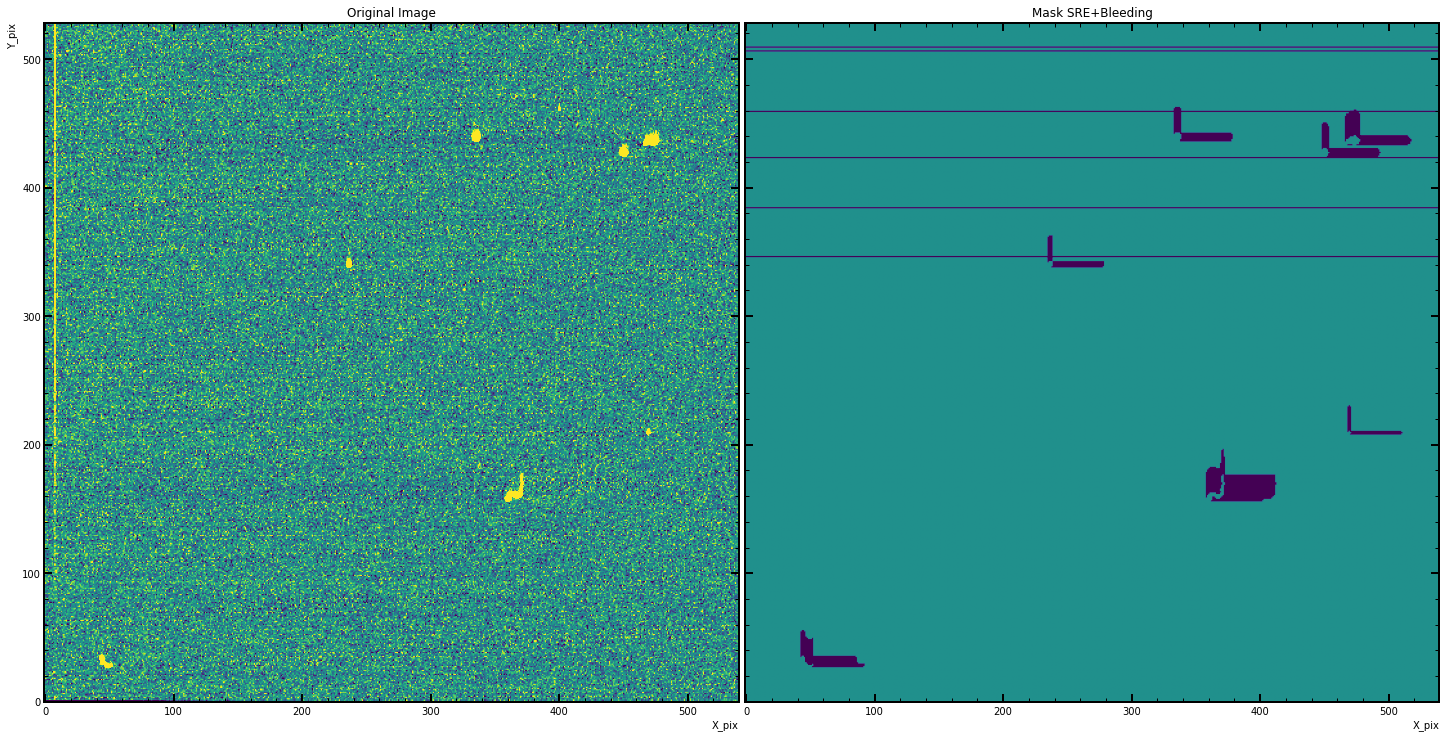

In [10]:
label=ndimage.label(data[0]>4,structure=[[1,1,1],[1,1,1],[1,1,1]])[0]

rps=sk.regionprops(label,intensity_image=data[0],cache=False, extra_properties=[sum_intensity])
areas=[r.area for r in rps]
energy=[r.sum_intensity for r in rps]
centr=[r.weighted_centroid for r in rps]
ecce=[r.eccentricity for r in rps]
dic_props={"areas":areas,"energias":energy,'centroid':centr, "excentricidade":ecce}

df=pd.DataFrame.from_dict(dic_props)
df.index = np.arange(1, len(df)+1)
# df.head(35) #show dataframe

energias=dic_props["energias"]
exce=dic_props["excentricidade"]
hee_list=np.where((np.array(energias)>80) & (np.array(exce)!=1))[0].tolist() #index od the dictionary of events ---> TRESHOLD OF 80 ELECTRONS TO BE HE

areas=dic_props["areas"]
see_list=np.where((np.array(exce)==1) & (np.array(areas)>9))[0].tolist() 
see_list

HE_events=np.zeros_like(label)
for event in hee_list:
    [x,y]=np.where(label==event+1)
    for i in range(len(x)):
        HE_events[x[i],y[i]]=1

SRE_events=np.zeros_like(label)
for event in see_list:
    [x,y]=np.where(label==event+1)
    for i in range(len(x)):
        SRE_events[x[i],y[i]]=1

mask_bleeding=ndimage.binary_dilation(HE_events>0,structure=[[0,0,0],[0,1,1],[0,0,0]],iterations=40)*1.0#-(HE_events>0)*1.0

maskV_bleeding=ndimage.binary_dilation(HE_events>0,structure=[[0,0,0],[0,1,0],[0,1,0]],iterations=20)*1.0#-(HE_events>0)*1.0

matriz2, dmask=no_sr(data[0]+((maskV_bleeding+mask_bleeding+HE_events))*-1e7,threshold=3,trem=20)

pre_sre=ndimage.label((data[0]+((maskV_bleeding+mask_bleeding+HE_events))*-1e7)>1.5,structure=[[0,0,0],[1,1,1],[0,0,0]])[0]

rps=sk.regionprops(pre_sre,cache=False)
areas=[r.area for r in rps]

SRE_events=np.zeros_like(pre_sre)
for event in np.where(np.array(areas)>1)[0].tolist():
    [x,y]=np.where(pre_sre==event+1)
    for i in range(len(x)):
        SRE_events[x[i],y[i]]=1

SRE_mask=np.zeros_like(SRE_events)
for y in np.unique(np.where(SRE_events==1)[0]).tolist(): SRE_mask[y,:]=1

rps=sk.regionprops(label,intensity_image=data[1],cache=False, extra_properties=[sum_intensity])
areas=[r.area for r in rps]
energy=[r.sum_intensity for r in rps]
centr=[r.weighted_centroid for r in rps]
ecce=[r.eccentricity for r in rps]
dic_props={"areas":areas,"energias":energy,'centroid':centr, "excentricidade":ecce}

flag0=[]
for i in range(len(centr)):
    if int(centr[i][0]) not in np.unique(np.where(SRE_events==1)[0]).tolist():
        
        flag0.append(i)

flag0_events=np.zeros_like(label)
for event in flag0:
    [x,y]=np.where(label==event+1)
    for i in range(len(x)):
        flag0_events[x[i],y[i]]=1

fig=plt.figure(figsize=(25,15))
plt.subplot(121)
plt.title('Original Image')
plt.imshow(data[0],vmin=-1,vmax=1)
plt.ylabel('Y_pix')
plt.xlabel('X_pix')
plt.subplot(122)
plt.imshow(-(maskV_bleeding+mask_bleeding-2*HE_events+SRE_mask),vmin=-1,vmax=1)
plt.title('Mask SRE+Bleeding')
plt.tick_params('y', labelleft=False)
plt.subplots_adjust(wspace=0.01)
plt.xlabel('X_pix')
plt.savefig('Imageandmask.png', bbox_inches='tight', dpi=100)
plt.show()


In [11]:
np.nan

nan

In [12]:
data=np.array([[1,1,1],[1,1,1],[1,1,1],[1,1,1],[1,1,1]])
data

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [13]:
mask=np.array([[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0]])
mask

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [14]:
np.where(mask,np.nan,data)

array([[nan,  1.,  1.],
       [ 1., nan,  1.],
       [ 1.,  1., nan],
       [nan,  1.,  1.],
       [ 1., nan,  1.]])

In [15]:
np.s_[2::2]

slice(2, None, 2)

In [16]:

mask=np.s_[::]  #steps  [start:end:steps], example [::2] = [from first:to end:in steps of]
#https://www.youtube.com/watch?v=PbKOrSottRQ

In [17]:
mask


slice(None, None, None)

In [18]:
popt=[1,2,3,4]
print(*popt) #* desempaqueta los elementos en el interior de un objeto iterable
print(popt)

1 2 3 4
[1, 2, 3, 4]
